<a href="https://colab.research.google.com/github/umaimaparveen-com/gaia-dr3-binary-stars-visualization/blob/main/EDA_Visualizations_GAIADR3_Catalogue.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DATA ACCESS TO GAIA

In [ ]:
!pip install astroquery

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 18.9 MB/s eta 0:00:00


In [ ]:
from astroquery.gaia import Gaia
import numpy as np
import pandas as pd

In [ ]:
tables=Gaia.load_tables(only_names=True)
for table in tables:
  if 'gaiadr3' in table.get_qualified_name():
    print (table.get_qualified_name())


INFO:astroquery:Retrieving tables...


INFO: Retrieving tables... [astroquery.utils.tap.core]


INFO:astroquery:Parsing tables...


INFO: Parsing tables... [astroquery.utils.tap.core]


INFO:astroquery:Done.


INFO: Done. [astroquery.utils.tap.core]
gaiadr3.gaiadr3.gaia_source
gaiadr3.gaiadr3.gaia_source_lite
gaiadr3.gaiadr3.astrophysical_parameters
gaiadr3.gaiadr3.astrophysical_parameters_supp
gaiadr3.gaiadr3.oa_neuron_information
gaiadr3.gaiadr3.oa_neuron_xp_spectra
gaiadr3.gaiadr3.total_galactic_extinction_map
gaiadr3.gaiadr3.total_galactic_extinction_map_opt
gaiadr3.gaiadr3.commanded_scan_law
gaiadr3.gaiadr3.allwise_best_neighbour
gaiadr3.gaiadr3.allwise_neighbourhood
gaiadr3.gaiadr3.apassdr9_best_neighbour
gaiadr3.gaiadr3.apassdr9_join
gaiadr3.gaiadr3.apassdr9_neighbourhood
gaiadr3.gaiadr3.dr2_neighbourhood
gaiadr3.gaiadr3.gsc23_best_neighbour
gaiadr3.gaiadr3.gsc23_join
gaiadr3.gaiadr3.gsc23_neighbourhood
gaiadr3.gaiadr3.hipparcos2_best_neighbour
gaiadr3.gaiadr3.hipparcos2_neighbourhood
gaiadr3.gaiadr3.panstarrs1_best_neighbour
gaiadr3.gaiadr3.panstarrs1_join
gaiadr3.gaiadr3.panstarrs1_neighbourhood
gaiadr3.gaiadr3.ravedr5_best_neighbour
gaiadr3.gaiadr3.ravedr5_join
gaiadr3.gaiadr3.rave

In [ ]:
print(len(tables))

246


Asynchronoous commands saves the results at server side whereas synchronous commands saves it on the user side and can only extract 2000 rows.

In [ ]:
myquery="Select * from gaiadr3.nss_two_body_orbit"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table= job.get_results()
table.info

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


<Table length=443205>
             name               dtype    unit                                                                     description                                                                    n_bad 
------------------------------ ------- -------- ------------------------------------------------------------------------------------------------------------------------------------------------ ------
                   solution_id   int64                                                                                                                                       Solution Identifier      0
                     SOURCE_ID   int64                                                                                                                                         Source Identifier      0
             nss_solution_type  object                                                                                                                                         NSS

This is the main table consisting of data on binary stars. It has one ibject, integer and float datatypes. We can cross the tables between this and the other two tables using the primary key nss_solution_type.

*   There are lot of null values present in the dataset. They have to be dealt with by either removing these or adding the mean value. Research what to do as they are more in number.


In [ ]:
source_df=(job.get_results()).to_pandas()
source_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 443205 entries, 0 to 443204
Data columns (total 77 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   solution_id                     443205 non-null  int64  
 1   SOURCE_ID                       443205 non-null  int64  
 2   nss_solution_type               443205 non-null  object 
 3   ra                              169227 non-null  float64
 4   ra_error                        169227 non-null  float32
 5   dec                             169227 non-null  float64
 6   dec_error                       169227 non-null  float32
 7   parallax                        169227 non-null  float64
 8   parallax_error                  169227 non-null  float32
 9   pmra                            169227 non-null  float64
 10  pmra_error                      169227 non-null  float32
 11  pmdec                           169227 non-null  float64
 12  pmdec_error     

In [ ]:
myquery="Select nss_solution_type, count(*) from gaiadr3.nss_two_body_orbit group by nss_solution_type"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table=job.get_results()
print(table)

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
      nss_solution_type        COUNT_ALL
------------------------------ ---------
               AstroSpectroSB1     33467
               EclipsingBinary     86918
              EclipsingSpectro       155
                       Orbital    134598
            OrbitalAlternative       619
   OrbitalAlternativeValidated        10
         OrbitalTargetedSearch       345
OrbitalTargetedSearchValidated       188
                           SB1    181327
                          SB1C       202
                           SB2      4630
                          SB2C       746


* AstroSpectroSB1: Combined astrometric + single lined spectroscopic orbital model
* EclipsingBinary: Eclipsing binary model
* EclipsingSpectro: Combined eclipsing binary + spectroscopic orbital model
* Orbital: Orbital model for an astrometric binary
* OrbitalAlternative[Validated]: Alternative orbital model mainly for low S/N systems, with a subset containing suffix ‘Validated’
* OrbitalTargetedSearch[Validated]: Orbital model for a priori known systems, with a subset containing suffix ‘Validated’
* SB1: Single Lined Spectroscopic binary model
* SB2: Double Lined Spectroscopic binary model
* SB1C: Single Lined Spectroscopic binary model with circular orbit
* SB2C: Double Lined Spectroscopic binary model with circular orbit, here you can fill the data of eccentricity as zero because it is null, we can assume that since it is a perfect circle we can take it as zero.

In [ ]:
myquery="Select * from gaiadr3.nss_acceleration_astro"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table= job.get_results()
table.info

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


<Table length=338215>
           name            dtype     unit                               description                              n_bad 
------------------------- ------- --------- -------------------------------------------------------------------- ------
              solution_id   int64                                                            Solution Identifier      0
                SOURCE_ID   int64                                                              Source Identifier      0
        nss_solution_type  object                                                              NSS model adopted      0
                       ra float64       deg                                                      Right ascension      0
                 ra_error float32       mas                                    Standard error of right ascension      0
                      dec float64       deg                                                          Declination      0
                de

In [ ]:
myquery="Select nss_solution_type, count(*) from gaiadr3.nss_acceleration_astro group by nss_solution_type"
job=Gaia.launch_job_async(myquery,dump_to_file=False)
table=job.get_results()
table

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


nss_solution_type,COUNT_ALL
object,int64
Acceleration7,246947
Acceleration9,91268




*   Acceleration model with 7 parameters
*   Acceleration model with 9 parameters



In [ ]:
myquery="Select * from gaiadr3.nss_non_linear_spectro"
job= Gaia.launch_job_async(myquery,dump_to_file=False)
table= job.get_results()
table.info

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


<Table length=56808>
            name             dtype      unit                              description                           n_bad
--------------------------- ------- ----------- --------------------------------------------------------------- -----
                solution_id   int64                                                         Solution Identifier     0
                  SOURCE_ID   int64                                                           Source Identifier     0
          nss_solution_type  object                                                           NSS model adopted     0
              mean_velocity float64      km / s                                                   Mean velocity     0
        mean_velocity_error float32      km / s                                 Standard error of Mean velocity     0
       first_deriv_velocity float64  km / (d s)                          First order derivative of the velocity     0
 first_deriv_velocity_error float32

In [ ]:
myquery="Select nss_solution_type, count(*) from gaiadr3.nss_non_linear_spectro group by nss_solution_type"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table=job.get_results()
table

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


nss_solution_type,COUNT_ALL
object,int64
FirstDegreeTrendSB1,24083
SecondDegreeTrendSB1,32725




*   Single Lined first degree trend
*   Double Lined first degree trend



# Plotting binary star SB2C orbit with Kepler's Third Law

Selection of features was done by domain knowledge of Kepler's Third Law.


---



In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
def keplerIII_period_to_semimajor_axis(orbital_period):
    #########################################################
    # Units: orbital period [yr], separation [au]           #
    #########################################################
    semimajor_axis_cubed = orbital_period**2
    semimajor_axis = semimajor_axis_cubed**(1./3.)

    return semimajor_axis

def make_kepler_orbit(eccentricity,orbital_period):
    ##########################################################
    # Units: orbital period [years]                          #
    # returns: 500 true anomaly values throughout the orbit  #
    ##########################################################
    nStep = 500
    tRange = np.linspace(0.0,orbital_period,nStep)

    theta = []
    for time in tRange:
        PsiDiff = 1.0
        M = 2*np.pi*time/orbital_period
        PsiOld = M
        iteration = 0
        max_iterations = 100
        while PsiDiff > 1e-10 and iteration < max_iterations:
            PsiNew = M + eccentricity*np.sin(PsiOld)
            PsiDiff = abs(PsiNew - PsiOld)
            PsiOld = PsiNew
            iteration += 1
        theta0 = 2 * np.arctan2(
            np.sqrt(1 + eccentricity) * np.tan(PsiOld / 2),
            np.sqrt(1 - eccentricity)
        )
        theta.append(theta0)
    return np.array(theta)

In [ ]:
myquery="Select TOP 10 source_id, nss_solution_type, center_of_mass_velocity, semi_amplitude_primary, semi_amplitude_secondary, period, t_periastron from gaiadr3.nss_two_body_orbit where nss_solution_type='SB2C' order by period asc"
job= Gaia.launch_job_async(myquery, dump_to_file=False)
table=job.get_results()
table

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


SOURCE_ID,nss_solution_type,center_of_mass_velocity,semi_amplitude_primary,semi_amplitude_secondary,period,t_periastron
,,km / s,km / s,km / s,d,d
int64,object,float64,float64,float64,float64,float64
2508591445842660480,SB2C,-40.98067314739559,29.857376375883455,31.09344970401208,0.25178955745008436,0.09802338930829511
2064107926079227648,SB2C,-10.885494305573177,145.51672005448154,223.35694133287484,0.2906336661840662,0.056927941074862334
2792776718716502400,SB2C,11.599352447707274,33.7626841574862,32.970434453214715,0.3341266758206554,0.004988688375435858
4520001798236994816,SB2C,42.35075647361409,177.56759947125312,169.07528404202534,0.3422685354199281,-0.026030072345658635
1442995697335102720,SB2C,-19.974036208471997,140.35575730644945,69.97471425155845,0.352525854417478,0.04538564132301057
6486845482614663296,SB2C,43.80318215257955,101.4838571110144,246.64753257791233,0.3577214980145674,-0.07607246828164155
1454617122923582976,SB2C,-28.12866521843561,97.28799849335864,226.1884357450699,0.3669779107663673,-0.006746965292327892
4918316038771310464,SB2C,9.923615649127145,83.69128844716808,81.58902907266119,0.3732441942226014,-0.12450464009770651


In [ ]:
K1 = 85.24207217632912  # Semi-amplitude for primary star (km/s)
K2 = 230.48250007519627   # Semi-amplitude for secondary star (km/s)
v_com = -13.80269205270752
orbital_period_days = 0.38938088156440903*24*3600
eccentricity = 0.0
t_periastron= -0.05194235193387017 #not using this feature

In [ ]:
def orbit(semimajor_axis,eccentricity,true_anomaly):
    ##############################################
    # Units: separation [au] #
    ##############################################

    # define the shape equation
    r_orbit = semimajor_axis*(1 - eccentricity**2)/(1 + eccentricity*np.cos(true_anomaly))
    x_orbit = r_orbit*np.cos(true_anomaly)
    y_orbit = r_orbit*np.sin(true_anomaly)

    return x_orbit,y_orbit

In [ ]:
P_years = orbital_period_days/ (365.25 * 24 * 3600)

In [ ]:
semimajor_axis = keplerIII_period_to_semimajor_axis(P_years)

In [ ]:
# Calculate distances from the center of mass
d1 = (K1 / (K1 + K2)) * semimajor_axis  # Distance of star 1 from the barycenter
d2 = (K2 / (K1 + K2)) * semimajor_axis  # Distance of star 2 from the barycenter

In [ ]:
true_anomaly_angles = make_kepler_orbit(eccentricity,P_years)

In [ ]:
xOrbit1,yOrbit1 = orbit(d1,eccentricity,true_anomaly_angles)
xOrbit2,yOrbit2 = orbit(d2,eccentricity,true_anomaly_angles)

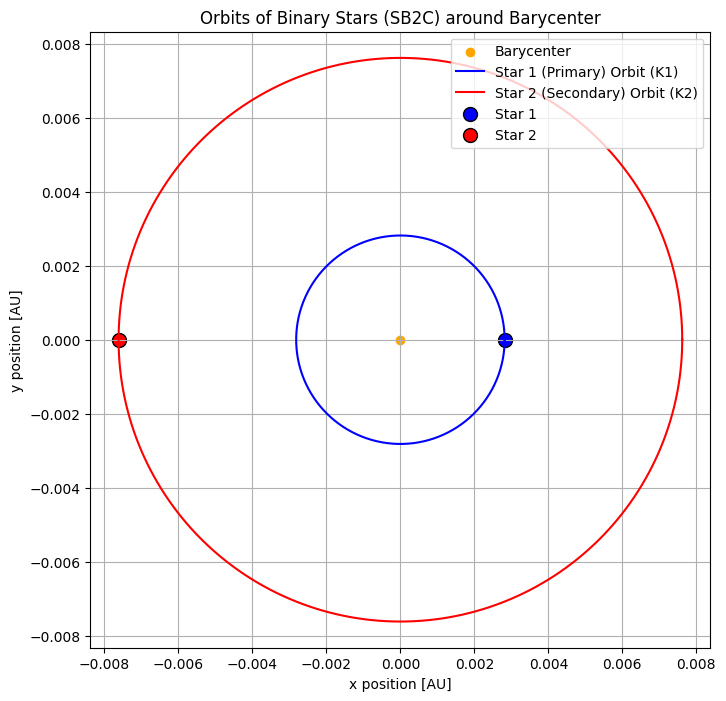

In [ ]:
# Plot the orbits
plt.figure(figsize=(8, 8))
plt.scatter(0, 0, color='orange', label='Barycenter')  # Barycenter at the origin
plt.plot(xOrbit1,yOrbit1 ,label='Star 1 (Primary) Orbit (K1)', color='blue')
plt.plot(xOrbit2,yOrbit2, label='Star 2 (Secondary) Orbit (K2)', color='red')

# Marking the stars at their positions at periastron
plt.scatter(d1, 0, color='blue', s=100, edgecolor='black', label='Star 1')
plt.scatter(-d2, 0, color='red', s=100, edgecolor='black', label='Star 2')

plt.title('Orbits of Binary Stars (SB2C) around Barycenter')
plt.axis('equal')
plt.xlabel('x position [AU]')
plt.ylabel('y position [AU]')
plt.legend()
plt.grid(True)
plt.show()

#Plotting the solar system orbits with Kepler's Third Law

**Identifying the tables with the data of solar system objects are : sso_source and sso_orbits** Selection of the features were also done by domain knwoledge of Kepler's Third Law.

---



In [ ]:
myquery= "Select * from gaiadr3.sso_source"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table=job.get_results()
table.info

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


<Table length=158152>
     name      dtype                      description                    
-------------- ------ ---------------------------------------------------
   solution_id  int64                                 Solution Identifier
     SOURCE_ID  int64                                   Source identifier
    num_of_obs  int32                              number of observations
     number_mp  int64                                 Minor Planet number
  denomination object           standard MPC denomination of the asteroid
num_of_spectra  int32 Number of epoch spectra used to compute the average

In [ ]:
myquery= "Select * from gaiadr3.sso_orbits"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table=job.get_results()
table.info

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


<Table length=154741>
               name                dtype      unit                            description                        
--------------------------------- ------- ------------ ----------------------------------------------------------
                        number_mp   int32                                                              SSO Number
                     denomination  object                                                Solar system object name
                        osc_epoch float64            d                       Reference epoch for osculating orbit
                     mean_anomaly float64          rad                                               Mean anomaly
                   arg_perihelion float64          rad                                     Argument of perihelion
                    long_asc_node float64          rad                                Longitude of ascending node
                      inclination float64          rad            

We have the required features needed for the plotting of orbits like the eccentricity, semi_major_axis.

In [ ]:
df=table.to_pandas()
df.head()

,number_mp,denomination,osc_epoch,mean_anomaly,arg_perihelion,long_asc_node,inclination,eccentricity,semi_major_axis,orbital_elements_var_covar_matrix,std_dev_semi_major_axis,h_state_vector,h_state_vector_var_covar_matrix,arc_length,num_observations
0,34848,2001_sc288,2276.0,3.071927,-2.481794,2.494781,0.399102,0.042493,3.248966,"[2.113551622815787e-15, -6.481953179971954e-16...",4.597338e-08,"[-3.292297386952647, -0.02580910295994002, 0.7...","[1.670940153965123e-17, 1.341274020803146e-18,...",789.743833,149
1,36061,haldane,2131.0,2.580352,0.512960,1.894826,0.061298,0.063186,3.256504,"[1.195962337616274e-13, -2.3106977910417066e-1...",3.458269e-07,"[1.1410703991721014, -2.970485049191334, -1.29...","[1.0348005518223577e-14, -1.3481821711050326e-...",858.918013,75
2,36903,2000_so179,2205.0,-2.813600,1.222535,4.837177,0.058380,0.120836,2.701355,"[2.3351964143411868e-15, -8.826476456638137e-1...",4.832387e-08,"[-3.006775401576546, -0.030631663770993484, -0...","[2.6009815026134227e-17, 4.014963317423272e-17...",971.856907,213
3,37060,2000_uk45,2216.0,-2.312245,-1.307382,2.402297,0.039296,0.183333,3.204429,"[2.068723030012274e-13, -4.2510645873527135e-1...",4.548322e-07,"[0.4435938474364648, -3.3600629866539093, -1.3...","[8.107686187871361e-15, -3.30900161290116e-17,...",578.313755,69
4,37452,spirit,2313.0,-0.105872,0.842289,6.149053,0.144239,0.220845,3.952545,"[1.4159535390277956e-13, 2.403003988711015e-14...",3.762916e-07,"[2.6482498486420285, 1.324374191581004, 0.8755...","[1.2577060318517344e-15, 1.6271771016929825e-1...",733.799490,199


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154741 entries, 0 to 154740
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   number_mp                          154741 non-null  int32  
 1   denomination                       154741 non-null  object 
 2   osc_epoch                          154741 non-null  float64
 3   mean_anomaly                       154741 non-null  float64
 4   arg_perihelion                     154741 non-null  float64
 5   long_asc_node                      154741 non-null  float64
 6   inclination                        154741 non-null  float64
 7   eccentricity                       154741 non-null  float64
 8   semi_major_axis                    154741 non-null  float64
 9   orbital_elements_var_covar_matrix  154741 non-null  object 
 10  std_dev_semi_major_axis            154741 non-null  float64
 11  h_state_vector                     1547

In [ ]:
myquery="SELECT TOP 10 denomination, mean_anomaly, eccentricity, semi_major_axis FROM gaiadr3.sso_orbits"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table=job.get_results()
df=table.to_pandas()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


In [ ]:
df.head(10)

,denomination,mean_anomaly,eccentricity,semi_major_axis
0,2001_sc288,3.071927,0.042493,3.248966
1,haldane,2.580352,0.063186,3.256504
2,2000_so179,-2.813600,0.120836,2.701355
3,2000_uk45,-2.312245,0.183333,3.204429
4,spirit,-0.105872,0.220845,3.952545
5,1997_wk13,0.382964,0.156276,2.311130
6,1999_jm14,-1.987357,0.159146,2.288144
7,1999_ng38,-1.689869,0.139582,2.318096
8,1999_gu8,-0.581791,0.208611,2.203320
9,2001_af38,1.148809,0.272735,2.454354


In [ ]:
def make_kepler_orbit(eccentricity, semi_major_axis):
    ##########################################################
    # Units: semi_major_axis [au]                          #
    # Returns: 500 true anomaly values throughout the orbit  #
    ##########################################################
    # Calculate the orbital period using Kepler's Third Law
    orbital_period = np.sqrt(semi_major_axis**3)

    nStep = 500
    tRange = np.linspace(0.0, orbital_period, nStep)

    theta = []
    for time in tRange:
        PsiDiff = 1.0
        M = 2 * np.pi * time / orbital_period
        PsiOld = M
        while PsiDiff > 1e-10:
            PsiNew = M + eccentricity * np.sin(PsiOld)
            PsiDiff = PsiNew - PsiOld
            PsiOld = PsiNew
        theta0 = 2 * np.arctan(((1 + eccentricity) / (1 - eccentricity))**0.5 * np.tan(PsiOld / 2.))
        theta.append(theta0)
    return np.array(theta)

def orbit(semimajor_axis,eccentricity,mean_anomaly):
    ##############################################
    # Units: separation [au] #
    ##############################################

    # define the shape equation
    r_orbit = semimajor_axis*(1 - eccentricity**2)/(1 + eccentricity*np.cos(mean_anomaly))
    x_orbit = r_orbit*np.cos(mean_anomaly)
    y_orbit = r_orbit*np.sin(mean_anomaly)

    return x_orbit,y_orbit

In [ ]:
eccentricity = 0.139582
semi_major_axis = 2.318096
true_anomalies = make_kepler_orbit(eccentricity, semi_major_axis)

In [ ]:
xOrbit, yOrbit = orbit(semimajor_axis,eccentricity,true_anomalies)

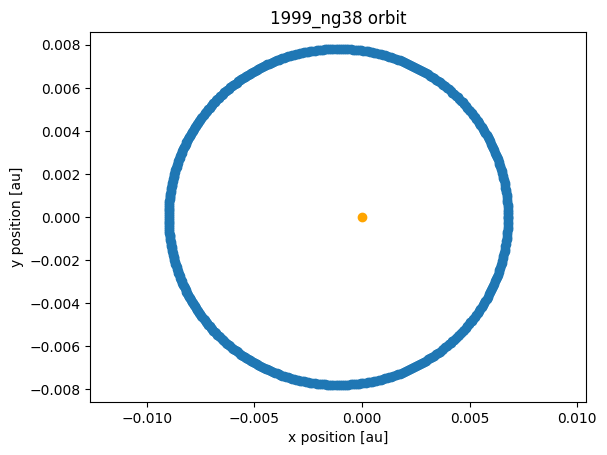

In [ ]:
plt.title('1999_ng38 orbit')
# The Sun is located at the origin.
plt.scatter(0,0, color='orange')
plt.scatter(xOrbit,yOrbit)
plt.axis('equal')
plt.xlabel('x position [au]')
plt.ylabel('y position [au]')
plt.show()

# Performing feature extraction and comparing the variance of features

**Feature extraction from sso_orbits**

In [ ]:
myquery= "Select * from gaiadr3.sso_orbits"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table=job.get_results()
table.info

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]


<Table length=154741>
               name                dtype      unit                            description                        
--------------------------------- ------- ------------ ----------------------------------------------------------
                        number_mp   int32                                                              SSO Number
                     denomination  object                                                Solar system object name
                        osc_epoch float64            d                       Reference epoch for osculating orbit
                     mean_anomaly float64          rad                                               Mean anomaly
                   arg_perihelion float64          rad                                     Argument of perihelion
                    long_asc_node float64          rad                                Longitude of ascending node
                      inclination float64          rad            

Choosing the semi_major_axis as the target variable. Which determines the orbit's size.

In [ ]:
df= table.to_pandas()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154741 entries, 0 to 154740
Data columns (total 15 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   number_mp                          154741 non-null  int32  
 1   denomination                       154741 non-null  object 
 2   osc_epoch                          154741 non-null  float64
 3   mean_anomaly                       154741 non-null  float64
 4   arg_perihelion                     154741 non-null  float64
 5   long_asc_node                      154741 non-null  float64
 6   inclination                        154741 non-null  float64
 7   eccentricity                       154741 non-null  float64
 8   semi_major_axis                    154741 non-null  float64
 9   orbital_elements_var_covar_matrix  154741 non-null  object 
 10  std_dev_semi_major_axis            154741 non-null  float64
 11  h_state_vector                     1547

In [ ]:
df.head()

,number_mp,denomination,osc_epoch,mean_anomaly,arg_perihelion,long_asc_node,inclination,eccentricity,semi_major_axis,orbital_elements_var_covar_matrix,std_dev_semi_major_axis,h_state_vector,h_state_vector_var_covar_matrix,arc_length,num_observations
0,34848,2001_sc288,2276.0,3.071927,-2.481794,2.494781,0.399102,0.042493,3.248966,"[2.113551622815787e-15, -6.481953179971954e-16...",4.597338e-08,"[-3.292297386952647, -0.02580910295994002, 0.7...","[1.670940153965123e-17, 1.341274020803146e-18,...",789.743833,149
1,36061,haldane,2131.0,2.580352,0.512960,1.894826,0.061298,0.063186,3.256504,"[1.195962337616274e-13, -2.3106977910417066e-1...",3.458269e-07,"[1.1410703991721014, -2.970485049191334, -1.29...","[1.0348005518223577e-14, -1.3481821711050326e-...",858.918013,75
2,36903,2000_so179,2205.0,-2.813600,1.222535,4.837177,0.058380,0.120836,2.701355,"[2.3351964143411868e-15, -8.826476456638137e-1...",4.832387e-08,"[-3.006775401576546, -0.030631663770993484, -0...","[2.6009815026134227e-17, 4.014963317423272e-17...",971.856907,213
3,37060,2000_uk45,2216.0,-2.312245,-1.307382,2.402297,0.039296,0.183333,3.204429,"[2.068723030012274e-13, -4.2510645873527135e-1...",4.548322e-07,"[0.4435938474364648, -3.3600629866539093, -1.3...","[8.107686187871361e-15, -3.30900161290116e-17,...",578.313755,69
4,37452,spirit,2313.0,-0.105872,0.842289,6.149053,0.144239,0.220845,3.952545,"[1.4159535390277956e-13, 2.403003988711015e-14...",3.762916e-07,"[2.6482498486420285, 1.324374191581004, 0.8755...","[1.2577060318517344e-15, 1.6271771016929825e-1...",733.799490,199


In [ ]:
df = df.drop('h_state_vector', axis=1)
df = df.drop('h_state_vector_var_covar_matrix',axis=1)

In [ ]:
df = df.drop('denomination',axis=1)

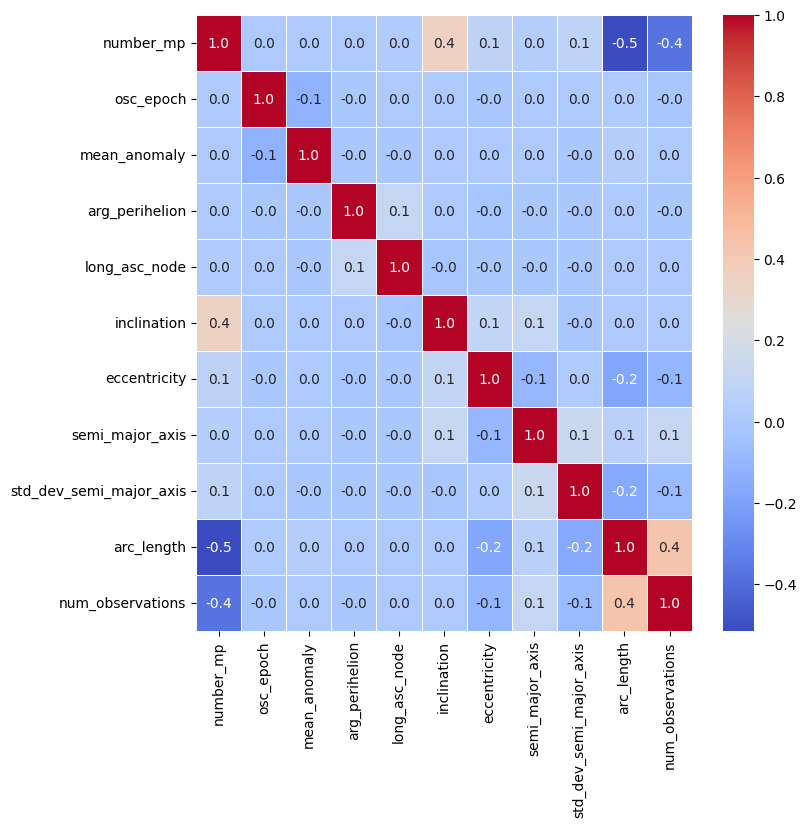

In [ ]:
import seaborn as sns
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt= '.1f',ax=ax);

Using SelectKBest for feature importance as it uses statistical relation like pearsons coefficient which ranks the columns with highest K features.

In [ ]:
threshold = 0.2
corr_matrix = df.corr().abs()
corr_matrix.head()

,number_mp,osc_epoch,mean_anomaly,arg_perihelion,long_asc_node,inclination,eccentricity,semi_major_axis,std_dev_semi_major_axis,arc_length,num_observations
number_mp,1.000000,0.003421,0.010172,0.009669,0.019920,0.350548,0.080120,0.040589,0.086388,0.514416,0.375928
osc_epoch,0.003421,1.000000,0.124723,0.000421,0.009235,0.007475,0.003912,0.004613,0.009509,0.016763,0.015292
mean_anomaly,0.010172,0.124723,1.000000,0.003901,0.000552,0.003214,0.004495,0.011117,0.005648,0.037401,0.006931
arg_perihelion,0.009669,0.000421,0.003901,1.000000,0.117381,0.000354,0.018439,0.000020,0.000375,0.001656,0.003206
long_asc_node,0.019920,0.009235,0.000552,0.117381,1.000000,0.017977,0.001517,0.002677,0.000341,0.008890,0.000746


In [ ]:
import numpy as np
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head()

,number_mp,osc_epoch,mean_anomaly,arg_perihelion,long_asc_node,inclination,eccentricity,semi_major_axis,std_dev_semi_major_axis,arc_length,num_observations
number_mp,NaN,0.003421,0.010172,0.009669,0.019920,0.350548,0.080120,0.040589,0.086388,0.514416,0.375928
osc_epoch,NaN,NaN,0.124723,0.000421,0.009235,0.007475,0.003912,0.004613,0.009509,0.016763,0.015292
mean_anomaly,NaN,NaN,NaN,0.003901,0.000552,0.003214,0.004495,0.011117,0.005648,0.037401,0.006931
arg_perihelion,NaN,NaN,NaN,NaN,0.117381,0.000354,0.018439,0.000020,0.000375,0.001656,0.003206
long_asc_node,NaN,NaN,NaN,NaN,NaN,0.017977,0.001517,0.002677,0.000341,0.008890,0.000746


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 3 columns to remove.


In [ ]:
df.drop(to_drop, axis=1, inplace=True)
df.head()

,number_mp,osc_epoch,mean_anomaly,arg_perihelion,long_asc_node,eccentricity,semi_major_axis,std_dev_semi_major_axis
0,34848,2276.0,3.071927,-2.481794,2.494781,0.042493,3.248966,4.597338e-08
1,36061,2131.0,2.580352,0.512960,1.894826,0.063186,3.256504,3.458269e-07
2,36903,2205.0,-2.813600,1.222535,4.837177,0.120836,2.701355,4.832387e-08
3,37060,2216.0,-2.312245,-1.307382,2.402297,0.183333,3.204429,4.548322e-07
4,37452,2313.0,-0.105872,0.842289,6.149053,0.220845,3.952545,3.762916e-07


In [ ]:
from sklearn.model_selection import train_test_split
# split data train 70 % and test 30 %
a = df.drop('semi_major_axis', axis=1)
b = df['semi_major_axis']
x_train, x_test, y_train, y_test = train_test_split(a, b, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(x_train, y_train)
scores = pd.DataFrame(selector.scores_, index=a.columns, columns=['Score'])
print("SelectKBest scores:\n", scores)

SelectKBest scores:
                                Score
number_mp                 192.593257
osc_epoch                   1.527258
mean_anomaly                9.680659
arg_perihelion              0.184980
long_asc_node               0.985022
eccentricity             1060.142462
std_dev_semi_major_axis  3305.474094


Hence out of these, note that the semi_major axis has the highest score in relation to eccentricity which makes sense as it is directly related to the size of the orbit followed by std_dev_semi_major_axis, mean_anomaly and osc_epoch which has the least relation can be considered to be dropped along with arg_perihelion and long_asc_node.

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(x_train, y_train)
mi_scores_df = pd.DataFrame(mi_scores, index=a.columns, columns=['MI Score'])
print("Mutual Information scores:\n", mi_scores_df)

Mutual Information scores:
                          MI Score
number_mp                0.199942
osc_epoch                0.043026
mean_anomaly             0.009798
arg_perihelion           0.000000
long_asc_node            0.000000
eccentricity             0.092929
std_dev_semi_major_axis  0.073123


Here also we can see a similar conclusion, highest dependency being eccentricity, std_sev_semi_major_axis,osc_epoch and mean_anomaly

In [ ]:
to_drop=['arg_perihelion','long_asc_node']
df.drop(to_drop, axis=1, inplace=True)

In [ ]:
df.head()

,number_mp,osc_epoch,mean_anomaly,eccentricity,semi_major_axis,std_dev_semi_major_axis
0,34848,2276.0,3.071927,0.042493,3.248966,4.597338e-08
1,36061,2131.0,2.580352,0.063186,3.256504,3.458269e-07
2,36903,2205.0,-2.813600,0.120836,2.701355,4.832387e-08
3,37060,2216.0,-2.312245,0.183333,3.204429,4.548322e-07
4,37452,2313.0,-0.105872,0.220845,3.952545,3.762916e-07


This is the top 5 features extracted from 14 columns.

---



#nss_two_body_orbit feature selection:

---



In [ ]:
myquery="Select * from gaiadr3.nss_two_body_orbit"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table= job.get_results()
df=table.to_pandas()
df.info()

In [ ]:
df = df.drop('corr_vec', axis=1)

In [ ]:
df = df.drop('nss_solution_type',axis=1)

In [ ]:
df=df.fillna(0)  # Replace NaN with 0

In [ ]:
threshold = 0.8
corr_matrix = df.corr().abs()
corr_matrix.head()

,solution_id,SOURCE_ID,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,...,r_l1_point_sum,r_spher_sum,ecl_time_primary,ecl_time_secondary,ecl_dur_primary,ecl_dur_secondary,g_luminosity_ratio,input_period_error,g_rank,astrometric_jitter
solution_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOURCE_ID,NaN,1.000000,0.014686,0.031470,0.540264,0.031710,0.045490,0.039088,0.023511,0.022176,...,0.075492,0.076629,0.000900,0.001831,0.034869,0.034945,0.047031,0.000072,0.076466,0.000496
ra,NaN,0.014686,1.000000,0.499912,0.000901,0.529430,0.436513,0.615970,0.058908,0.378820,...,0.305576,0.310849,0.001298,0.001815,0.126300,0.126449,0.242083,0.004884,0.321731,0.020811
ra_error,NaN,0.031470,0.499912,1.000000,0.027592,0.778125,0.474543,0.785895,0.034295,0.599956,...,0.224164,0.228033,0.000952,0.001331,0.092651,0.092760,0.177587,0.003583,0.236015,0.130990
dec,NaN,0.540264,0.000901,0.027592,1.000000,0.030137,0.004562,0.033280,0.026987,0.021526,...,0.021131,0.021496,0.000090,0.000126,0.008734,0.008744,0.016741,0.000338,0.022248,0.005900


In [ ]:
import numpy as np
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head()

,solution_id,SOURCE_ID,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,...,r_l1_point_sum,r_spher_sum,ecl_time_primary,ecl_time_secondary,ecl_dur_primary,ecl_dur_secondary,g_luminosity_ratio,input_period_error,g_rank,astrometric_jitter
solution_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOURCE_ID,NaN,NaN,0.014686,0.031470,0.540264,0.031710,0.045490,0.039088,0.023511,0.022176,...,0.075492,0.076629,0.000900,0.001831,0.034869,0.034945,0.047031,0.000072,0.076466,0.000496
ra,NaN,NaN,NaN,0.499912,0.000901,0.529430,0.436513,0.615970,0.058908,0.378820,...,0.305576,0.310849,0.001298,0.001815,0.126300,0.126449,0.242083,0.004884,0.321731,0.020811
ra_error,NaN,NaN,NaN,NaN,0.027592,0.778125,0.474543,0.785895,0.034295,0.599956,...,0.224164,0.228033,0.000952,0.001331,0.092651,0.092760,0.177587,0.003583,0.236015,0.130990
dec,NaN,NaN,NaN,NaN,NaN,0.030137,0.004562,0.033280,0.026987,0.021526,...,0.021131,0.021496,0.000090,0.000126,0.008734,0.008744,0.016741,0.000338,0.022248,0.005900


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 19 columns to remove.


In [ ]:
df.drop(to_drop, axis=1, inplace=True)
df.head()

,solution_id,SOURCE_ID,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,...,efficiency,significance,flags,conf_spectro_period,ecl_time_primary,ecl_time_secondary,ecl_dur_primary,g_luminosity_ratio,input_period_error,astrometric_jitter
0,4338096422163308546,5706079252076583424,126.407959,0.064663,-21.782017,0.100705,1.179984,0.022529,-0.928466,0.062391,...,0.000000,5.792437,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4338096422163308546,5706082992989226496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.229436,9.857978,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4338096422163308546,5706094984537873792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.234520,32.402454,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4338096422163308546,5706107598860484480,127.245290,0.035096,-21.383593,0.047472,3.167687,0.015209,-11.075071,0.015144,...,0.276523,19.175930,64,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4338096422163308546,5706124980589428992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.406646,11.034629,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split
# split data train 70 % and test 30 %
X = df.drop('eccentricity', axis=1)
Y = df['eccentricity']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X_train, Y_train)
scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['Score'])
print("SelectKBest scores:\n", scores)

SelectKBest scores:
                                        Score
solution_id                     7.552384e-15
SOURCE_ID                       9.573374e+02
ra                              5.069266e+04
ra_error                        4.333648e+04
dec                             1.785154e+02
dec_error                       5.193060e+04
parallax                        2.917297e+04
parallax_error                  3.731524e+04
pmra                            8.288361e+01
pmra_error                      1.751089e+04
pmdec                           2.092249e+03
pmdec_error                     1.514915e+04
a_thiele_innes                  1.650322e-03
a_thiele_innes_error            1.756187e+02
b_thiele_innes                  1.881493e+00
b_thiele_innes_error            1.534295e+02
f_thiele_innes                  7.255616e+00
g_thiele_innes                  2.311872e+00
g_thiele_innes_error            5.636212e+01
c_thiele_innes                  9.110961e-01
c_thiele_innes_error            1.

In [ ]:
top_columns = scores.nlargest(56, 'Score')
print("Top columns based on SelectKBest scores:\n", top_columns)

Top columns based on SelectKBest scores:
                                        Score
fill_factor_primary             1.210603e+05
period                          8.012891e+04
astrometric_n_obs_al            6.889661e+04
g_luminosity_ratio              6.240191e+04
dec_error                       5.193060e+04
ra                              5.069266e+04
eccentricity_error              4.475811e+04
ra_error                        4.333648e+04
parallax_error                  3.731524e+04
parallax                        2.917297e+04
efficiency                      2.643387e+04
fill_factor_secondary_error     1.829323e+04
pmra_error                      1.751089e+04
arg_periastron_error            1.732844e+04
ecl_dur_primary                 1.649163e+04
period_error                    1.571968e+04
fill_factor_primary_error       1.554938e+04
pmdec_error                     1.514915e+04
flags                           5.963720e+03
inclination_error               5.418337e+03
rv_n_obs_prim

In [ ]:
from sklearn.feature_selection import mutual_info_regression
mi_scores = mutual_info_regression(X_train, Y_train)
mi_scores_df = pd.DataFrame(mi_scores, index=X.columns, columns=['MI Score'])
print("Mutual Information scores:\n", mi_scores_df)

Mutual Information scores:
                                 MI Score
solution_id                     0.021700
SOURCE_ID                       0.090301
ra                              0.141687
ra_error                        0.164104
dec                             0.140703
dec_error                       0.165353
parallax                        0.147533
parallax_error                  0.142590
pmra                            0.140497
pmra_error                      0.146238
pmdec                           0.142048
pmdec_error                     0.145956
a_thiele_innes                  0.142078
a_thiele_innes_error            0.231918
b_thiele_innes                  0.147120
b_thiele_innes_error            0.225703
f_thiele_innes                  0.145123
g_thiele_innes                  0.142702
g_thiele_innes_error            0.223701
c_thiele_innes                  0.022195
c_thiele_innes_error            0.032096
h_thiele_innes                  0.021901
h_thiele_innes_error         

In [ ]:
top_columns = mi_scores_df.nlargest(56, 'MI Score')
print("Top columns based on SelectKBest scores:\n", top_columns)

Top columns based on SelectKBest scores:
                                 MI Score
eccentricity_error              0.545692
t_periastron_error              0.531783
significance                    0.477332
fill_factor_primary             0.459494
temperature_ratio_error         0.455656
input_period_error              0.455090
ecl_dur_primary                 0.453663
ecl_time_primary                0.453367
ecl_time_secondary              0.453243
inclination_error               0.452703
g_luminosity_ratio              0.451775
fill_factor_secondary_error     0.446305
period                          0.407317
period_error                    0.401829
efficiency                      0.364916
t_periastron                    0.344790
arg_periastron_error            0.311454
a_thiele_innes_error            0.231918
obj_func                        0.228849
b_thiele_innes_error            0.225703
g_thiele_innes_error            0.223701
fill_factor_primary_error       0.202429
rv_n_obs_primar

In [ ]:
correlations = df.corr()['eccentricity']
correlation_df = pd.DataFrame(correlations).reset_index()
correlation_df.columns = ['Feature', 'Correlation']

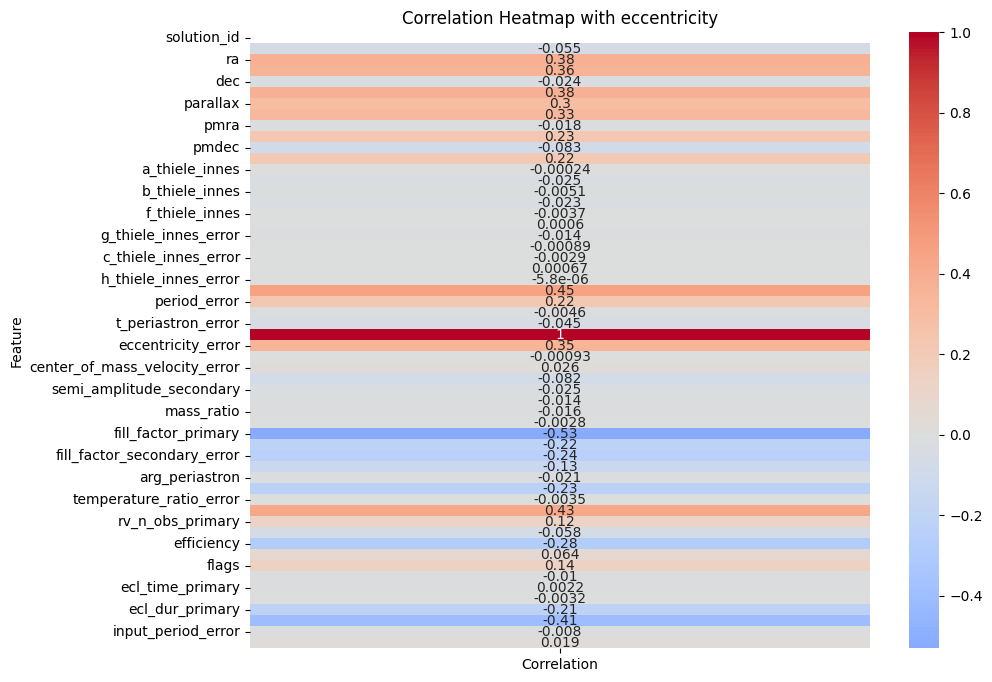

In [ ]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df.set_index('Feature'), annot=True, cmap='coolwarm', center=0)
plt.title(f'Correlation Heatmap with eccentricity')
plt.show()

<Axes: >

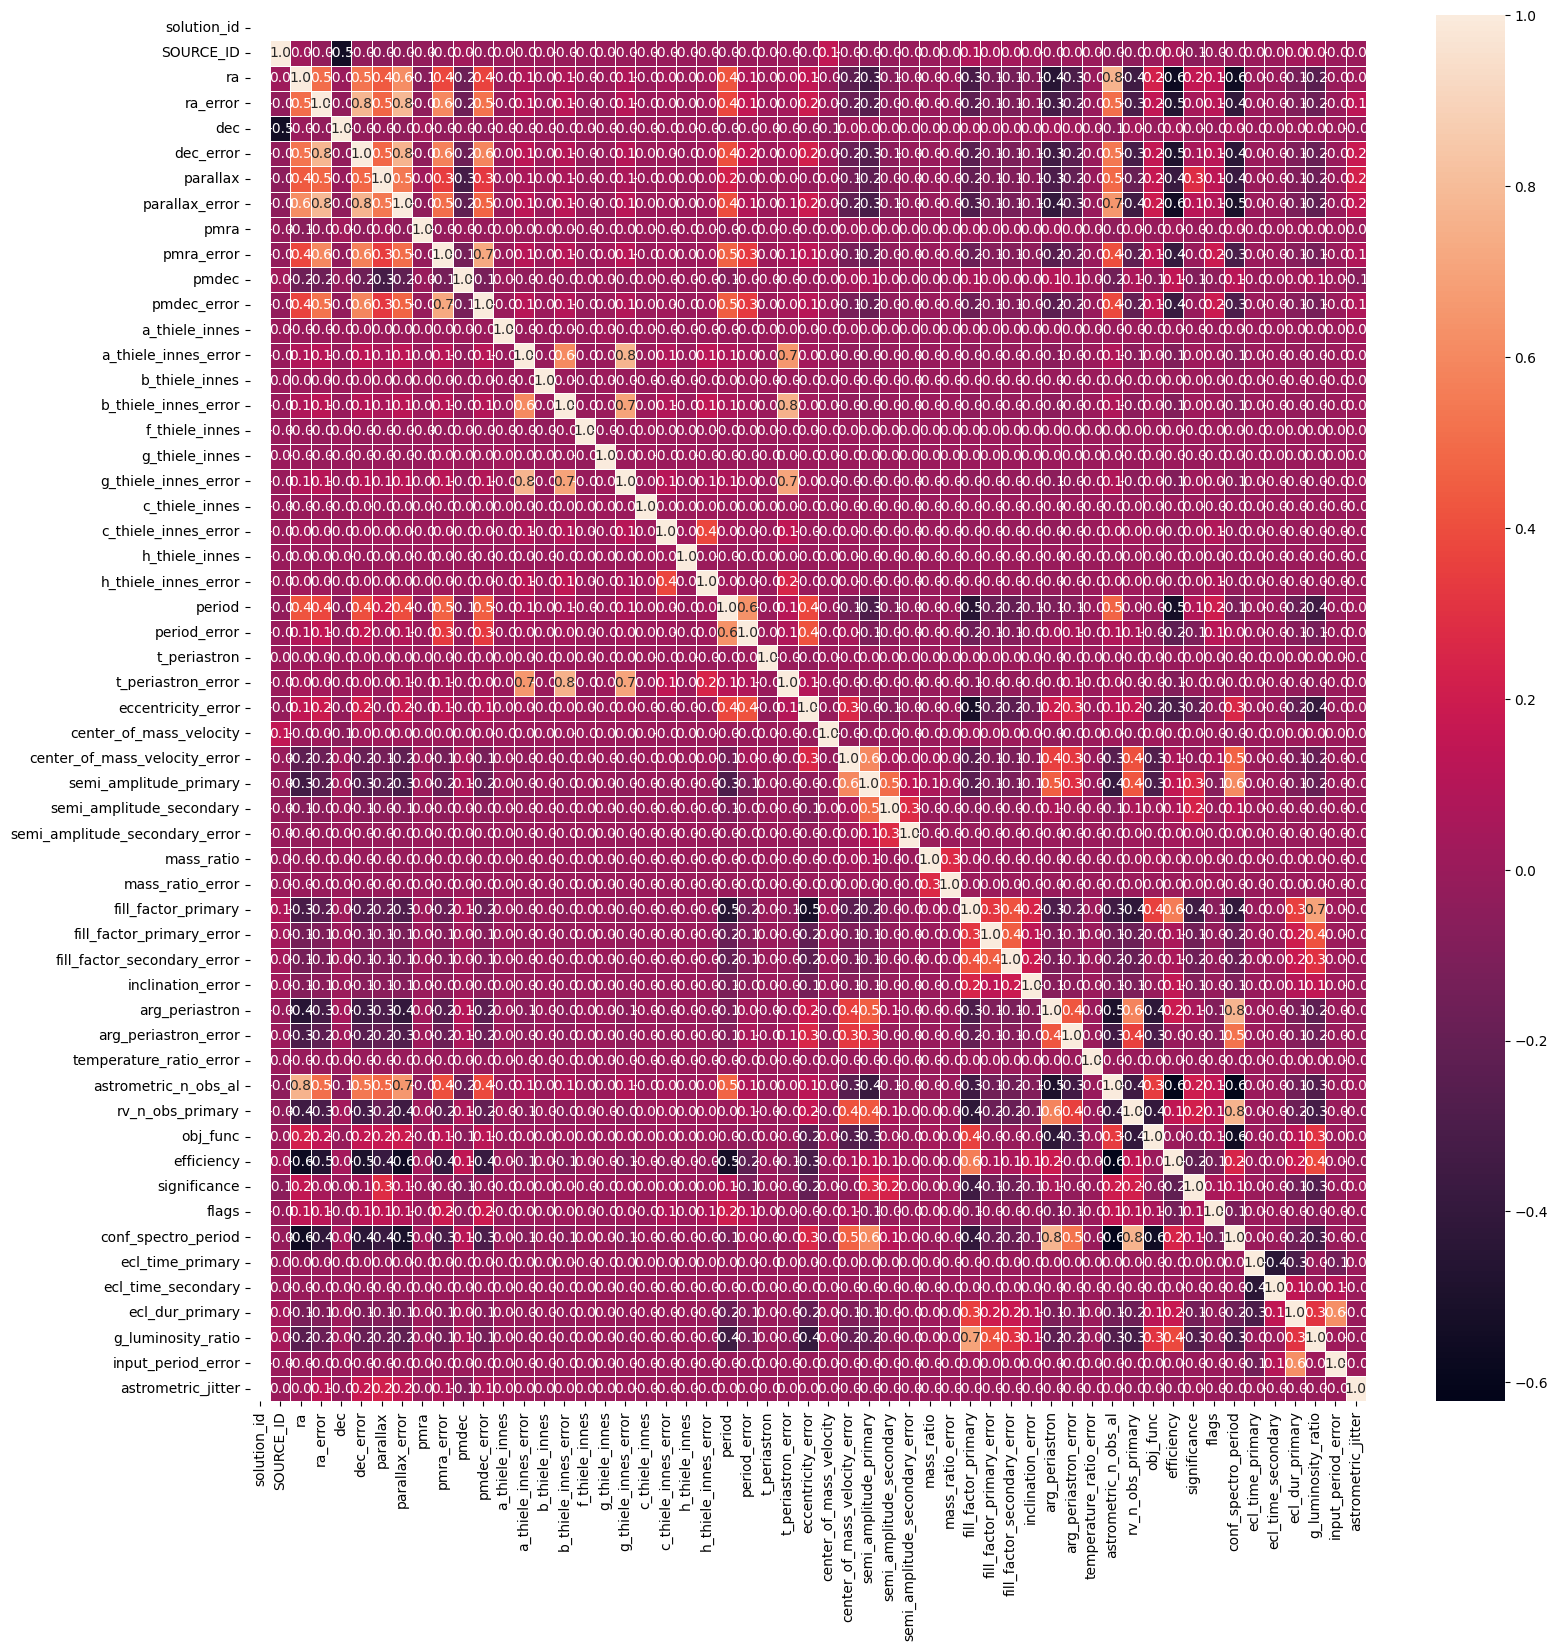

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

Note: After careful consideration from the Select kbest, MI score and the correlation map, we can drop the least dependent variables as follows:

In [ ]:
to_drop=['ecl_time_primary','ecl_time_secondary','ecl_dur_primary','input_period_error','astrometric_jitter','temperature_ratio_error']
X.drop(to_drop, axis=1, inplace=True)

In [ ]:
X

,solution_id,SOURCE_ID,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,...,arg_periastron,arg_periastron_error,astrometric_n_obs_al,rv_n_obs_primary,obj_func,efficiency,significance,flags,conf_spectro_period,g_luminosity_ratio
0,4338096422163308546,5706079252076583424,126.407959,0.064663,-21.782017,0.100705,1.179984,0.022529,-0.928466,0.062391,...,0.000000,0.000000,424,0,464.745148,0.000000,5.792437,64,0.0,0.0
1,4338096422163308546,5706082992989226496,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,355.145269,41.267353,0,23,10.509953,0.229436,9.857978,0,1.0,0.0
2,4338096422163308546,5706094984537873792,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.379696,65.231476,0,31,20.442291,0.234520,32.402454,0,1.0,0.0
3,4338096422163308546,5706107598860484480,127.245290,0.035096,-21.383593,0.047472,3.167687,0.015209,-11.075071,0.015144,...,0.000000,0.000000,439,0,520.486023,0.276523,19.175930,64,0.0,0.0
4,4338096422163308546,5706124980589428992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,226.229873,13.756106,0,22,9.237286,0.406646,11.034629,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443200,4338096422163308546,5705985170814344192,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,151.058496,7.294718,0,37,28.264465,0.351097,20.122829,0,1.0,0.0
443201,4338096422163308546,5706002453762752896,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,199.438198,13.822191,0,26,23.769793,0.276105,104.602707,0,1.0,0.0
443202,4338096422163308546,5706017984363890432,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,312.574377,2.715832,0,27,27.710939,0.360024,23.590914,0,1.0,0.0
443203,4338096422163308546,5706076400218193280,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,175.248584,6.183571,0,29,37.365376,0.393436,18.663815,0,1.0,0.0


In [ ]:
nss_two_body_orbit=X

#nss_acceleration_astro feature selection
---



In [ ]:
myquery="Select * from gaiadr3.nss_acceleration_astro"
job=Gaia.launch_job_async(myquery, dump_to_file=False)
table= job.get_results()
df=table.to_pandas()
df.info()

INFO:astroquery:Query finished.


INFO: Query finished. [astroquery.utils.tap.core]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338215 entries, 0 to 338214
Data columns (total 29 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   solution_id                338215 non-null  int64  
 1   SOURCE_ID                  338215 non-null  int64  
 2   nss_solution_type          338215 non-null  object 
 3   ra                         338215 non-null  float64
 4   ra_error                   338215 non-null  float32
 5   dec                        338215 non-null  float64
 6   dec_error                  338215 non-null  float32
 7   parallax                   338215 non-null  float64
 8   parallax_error             338215 non-null  float32
 9   pmra                       338215 non-null  float64
 10  pmra_error                 338215 non-null  float32
 11  pmdec                      338215 non-null  float64
 12  pmdec_error                338215 no

In [ ]:
df = df.drop('nss_solution_type', axis=1)
df = df.drop('corr_vec',axis=1)

In [ ]:
df = df.drop('deriv_accel_ra',axis=1)
df = df.drop('deriv_accel_dec',axis=1)
df = df.drop('deriv_accel_ra_error',axis=1)
df = df.drop('deriv_accel_dec_error',axis=1)

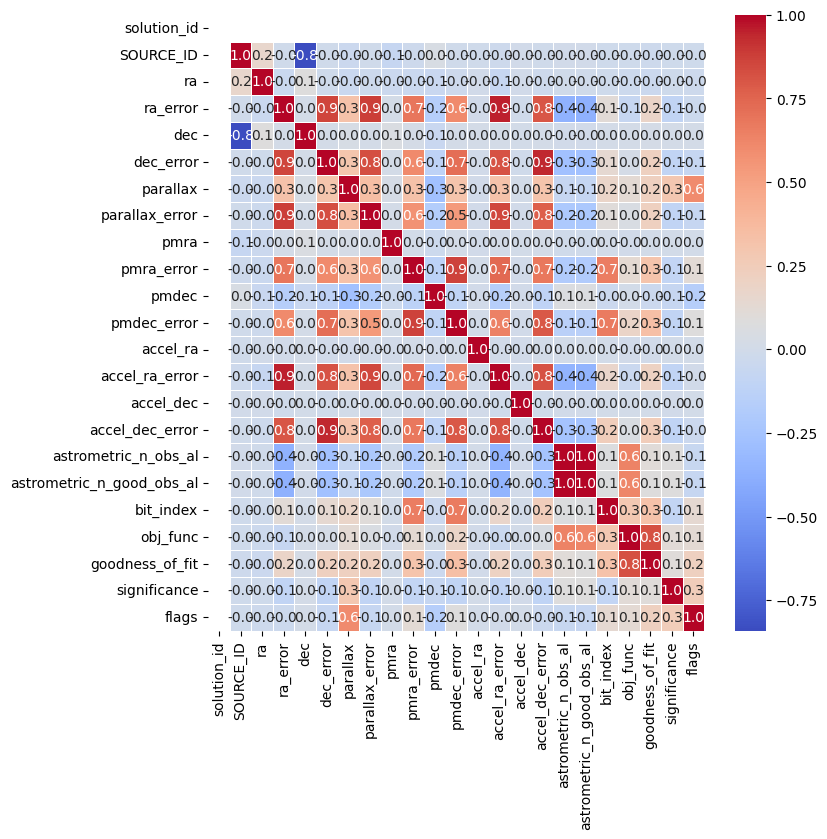

In [ ]:
import seaborn as sns
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths=.5, fmt= '.1f',ax=ax);

In [ ]:
threshold = 0.8
corr_matrix = df.corr().abs()
corr_matrix.head()

,solution_id,SOURCE_ID,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,...,accel_ra_error,accel_dec,accel_dec_error,astrometric_n_obs_al,astrometric_n_good_obs_al,bit_index,obj_func,goodness_of_fit,significance,flags
solution_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOURCE_ID,NaN,1.000000,0.164220,0.012901,0.841584,0.008006,0.038682,0.013892,0.069518,0.023455,...,0.022956,0.002073,0.009811,0.005004,0.004455,0.015979,0.020058,0.025357,0.015412,0.019441
ra,NaN,0.164220,1.000000,0.043584,0.080018,0.019842,0.049151,0.034510,0.039546,0.047284,...,0.064754,0.002407,0.027017,0.008388,0.007927,0.015013,0.030994,0.037844,0.015988,0.024968
ra_error,NaN,0.012901,0.043584,1.000000,0.008527,0.856681,0.320346,0.878018,0.012985,0.683687,...,0.949959,0.008339,0.802138,0.364154,0.367517,0.112279,0.067377,0.182716,0.094041,0.034481
dec,NaN,0.841584,0.080018,0.008527,1.000000,0.013151,0.029443,0.013473,0.051758,0.014786,...,0.012920,0.001311,0.013445,0.002466,0.003048,0.009839,0.013293,0.021229,0.011450,0.013300


In [ ]:
import numpy as np
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
upper.head()

,solution_id,SOURCE_ID,ra,ra_error,dec,dec_error,parallax,parallax_error,pmra,pmra_error,...,accel_ra_error,accel_dec,accel_dec_error,astrometric_n_obs_al,astrometric_n_good_obs_al,bit_index,obj_func,goodness_of_fit,significance,flags
solution_id,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SOURCE_ID,NaN,NaN,0.16422,0.012901,0.841584,0.008006,0.038682,0.013892,0.069518,0.023455,...,0.022956,0.002073,0.009811,0.005004,0.004455,0.015979,0.020058,0.025357,0.015412,0.019441
ra,NaN,NaN,NaN,0.043584,0.080018,0.019842,0.049151,0.034510,0.039546,0.047284,...,0.064754,0.002407,0.027017,0.008388,0.007927,0.015013,0.030994,0.037844,0.015988,0.024968
ra_error,NaN,NaN,NaN,NaN,0.008527,0.856681,0.320346,0.878018,0.012985,0.683687,...,0.949959,0.008339,0.802138,0.364154,0.367517,0.112279,0.067377,0.182716,0.094041,0.034481
dec,NaN,NaN,NaN,NaN,NaN,0.013151,0.029443,0.013473,0.051758,0.014786,...,0.012920,0.001311,0.013445,0.002466,0.003048,0.009839,0.013293,0.021229,0.011450,0.013300


In [ ]:
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print('There are %d columns to remove.' % (len(to_drop)))

There are 8 columns to remove.


In [ ]:
df.drop(to_drop, axis=1, inplace=True)
df.head()

,solution_id,SOURCE_ID,ra,ra_error,parallax,pmra,pmra_error,pmdec,accel_ra,accel_dec,astrometric_n_obs_al,bit_index,obj_func,significance,flags
0,4338096422163308546,6419877557965305984,282.503424,0.010877,1.524695,3.428497,0.033495,-14.696447,0.144221,0.749938,573,1023,1193.925415,27.334412,64
1,4338096422163308546,6419881547993114752,285.001937,0.012768,1.356238,-6.563667,0.017057,-15.929822,0.773421,-0.725531,585,255,831.272888,20.371754,64
2,4338096422163308546,6419890515884771200,285.926627,0.015372,1.654284,18.640417,0.020669,-9.933561,-1.988607,0.119045,605,255,750.744385,35.177242,0
3,4338096422163308546,6419891477957456256,285.787184,0.013636,1.110307,-20.681360,0.018171,-14.622846,-1.146504,-0.521957,572,255,508.053833,25.259857,0
4,4338096422163308546,6419907455235955712,285.300116,0.008864,1.402944,-9.022541,0.012300,-10.562063,-1.021341,0.034056,587,255,1063.488281,29.177454,64


In [ ]:
from sklearn.model_selection import train_test_split
# split data train 70 % and test 30 %
X = df.drop('parallax', axis=1)
Y = df['parallax']
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(x_train, y_train)
scores = pd.DataFrame(selector.scores_, index=a.columns, columns=['Score'])
print("SelectKBest scores:\n", scores)

SelectKBest scores:
                              Score
solution_id           9.215671e-16
SOURCE_ID             3.564089e+02
ra_error              5.143875e+02
parallax              2.744595e+04
pmra                  1.415181e+02
pmra_error            2.844226e+04
pmdec                 1.675918e+04
accel_ra              2.715162e+00
accel_dec             1.240176e+01
astrometric_n_obs_al  9.802723e+02
bit_index             7.864059e+03
obj_func              3.819270e+03
significance          2.268712e+04
flags                 1.336229e+05


In [ ]:
top_columns = scores.nlargest(20, 'Score')
print("Top columns based on SelectKBest scores:\n", top_columns)

Top columns based on SelectKBest scores:
                              Score
flags                 1.336229e+05
pmra_error            2.844226e+04
parallax              2.744595e+04
significance          2.268712e+04
pmdec                 1.675918e+04
bit_index             7.864059e+03
obj_func              3.819270e+03
astrometric_n_obs_al  9.802723e+02
ra_error              5.143875e+02
SOURCE_ID             3.564089e+02
pmra                  1.415181e+02
accel_dec             1.240176e+01
accel_ra              2.715162e+00
solution_id           9.215671e-16


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 338215 entries, 0 to 338214
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   solution_id           338215 non-null  int64  
 1   SOURCE_ID             338215 non-null  int64  
 2   ra                    338215 non-null  float64
 3   ra_error              338215 non-null  float32
 4   parallax              338215 non-null  float64
 5   pmra                  338215 non-null  float64
 6   pmra_error            338215 non-null  float32
 7   pmdec                 338215 non-null  float64
 8   accel_ra              338215 non-null  float64
 9   accel_dec             338215 non-null  float64
 10  astrometric_n_obs_al  338215 non-null  int32  
 11  bit_index             338215 non-null  int64  
 12  obj_func              338215 non-null  float32
 13  significance          338215 non-null  float32
 14  flags                 338215 non-null  int64  
dtype

In [ ]:
nss_acceleration_astro=df

#Merging of the binary stars table

In [ ]:
merged = pd.merge(nss_two_body_orbit, nss_acceleration_astro, on='SOURCE_ID', how='inner')

In [ ]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9424 entries, 0 to 9423
Data columns (total 63 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   solution_id_x                   9424 non-null   int64  
 1   SOURCE_ID                       9424 non-null   int64  
 2   ra_x                            9424 non-null   float64
 3   ra_error_x                      9424 non-null   float32
 4   dec                             9424 non-null   float64
 5   dec_error                       9424 non-null   float32
 6   parallax_x                      9424 non-null   float64
 7   parallax_error                  9424 non-null   float32
 8   pmra_x                          9424 non-null   float64
 9   pmra_error_x                    9424 non-null   float32
 10  pmdec_x                         9424 non-null   float64
 11  pmdec_error                     9424 non-null   float32
 12  a_thiele_innes                  94

In [ ]:
merged.head()

,solution_id_x,SOURCE_ID,ra_x,ra_error_x,dec,dec_error,parallax_x,parallax_error,pmra_x,pmra_error_x,...,pmra_y,pmra_error_y,pmdec_y,accel_ra,accel_dec,astrometric_n_obs_al_y,bit_index,obj_func_y,significance_y,flags_y
0,4338096422163308546,5706832761137262592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.325726,0.059037,1.426488,3.426231,0.526986,479,1023,1094.274414,40.168537,64
1,4338096422163308546,5706881002209948672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-18.431886,0.013773,2.380401,-0.090975,-1.812874,507,255,780.411194,49.712997,64
2,4338096422163308546,5707282255232660096,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-7.596987,0.060639,-6.579365,-2.133641,0.660064,944,1023,1545.644287,21.724413,64
3,4338096422163308546,5707509544908349440,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-2.323969,0.065395,0.176346,2.663198,-1.517782,670,1023,1102.819336,25.283813,64
4,4338096422163308546,5707562665064359808,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-9.923435,0.056318,2.449410,2.860665,-0.139498,576,1023,1244.262939,22.618696,64
